In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix
from datetime import datetime 

In [2]:
df = pd.read_csv('C:/Users/Owner/Downloads/credit-card-fraud/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.duplicated().sum()

1081

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

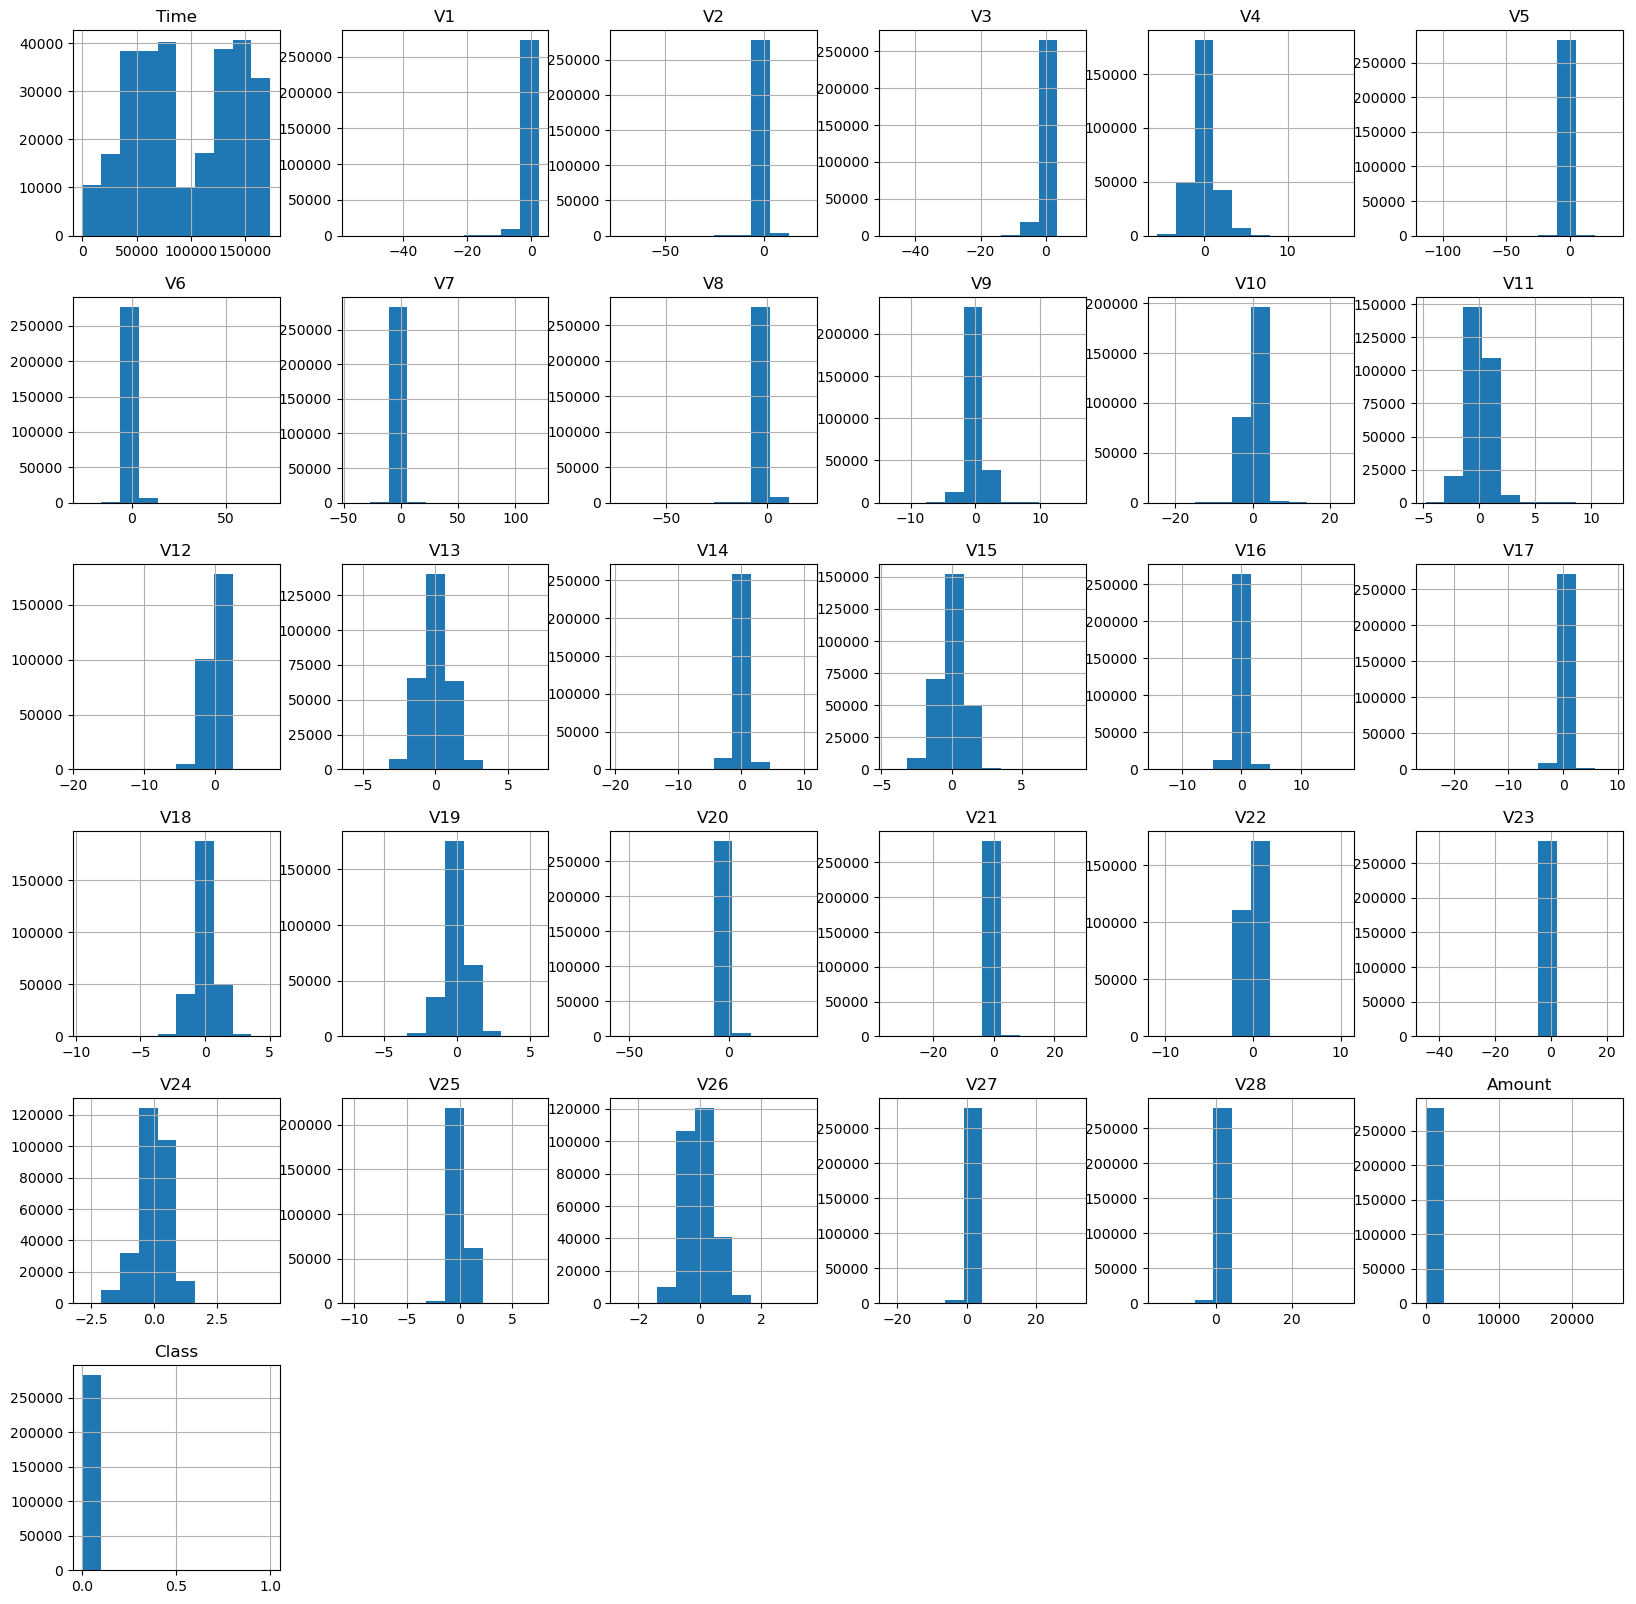

In [20]:
df.hist(figsize=(20,20))
plt.show()

<Axes: >

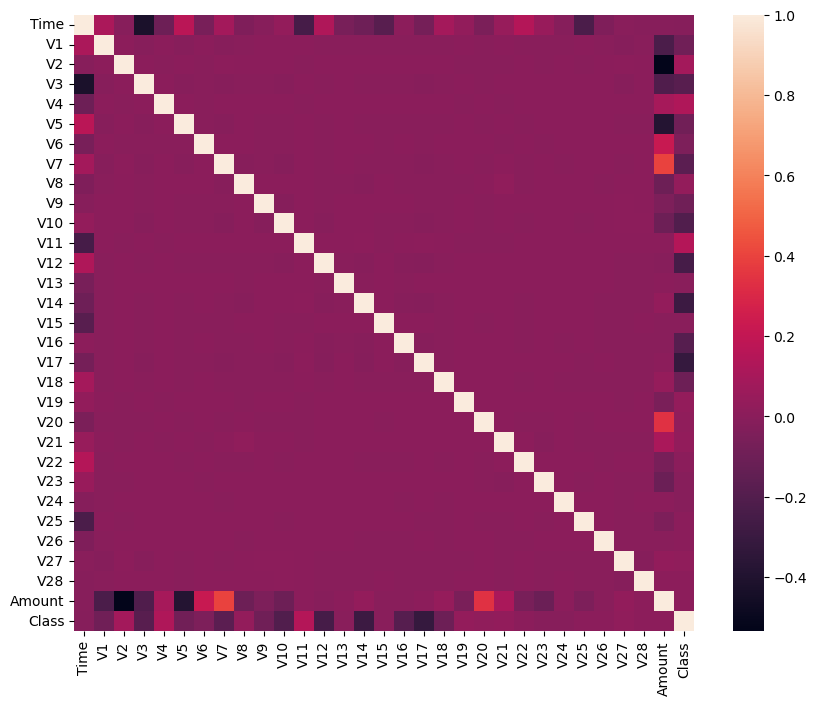

In [23]:
plt.figure(figsize=(10,8))
corr=df.corr()
sns.heatmap(corr)

In [7]:
X = df.drop(columns = ['Class'])
y = df['Class']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [15]:
rf=RandomForestClassifier()
start = datetime.now()
model=rf.fit(X_train,y_train)
end = datetime.now()
prediction=model.predict(X_test)
rf_score = accuracy_score(y_test,prediction)
rf_time = (end - start).total_seconds()

In [16]:
lr=LogisticRegression()
start = datetime.now()
model_lr = lr.fit(X_train,y_train)
end = datetime.now()
prediction_lr=model_lr.predict(X_test)
lr_score = accuracy_score(y_test,prediction_lr)
lr_time = (end - start).total_seconds()


C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
dt=DecisionTreeRegressor()
start = datetime.now()
model_dt = dt.fit(X_train,y_train)
end = datetime.now()
prediction_dt=model_dt.predict(X_test)
dt_score = accuracy_score(y_test,prediction_dt)
dt_time = (end - start).total_seconds()


In [18]:
svc = SVC()
start = datetime.now()
model_svc = svc.fit(X_train,y_train)
end = datetime.now()
prediction_svc=model_svc.predict(X_test)
svc_score = accuracy_score(y_test,prediction_svc)
svc_time = (end - start).total_seconds()

In [19]:
res_dict = {'model': ['RandomForestClassifier', 'Logistic Regression', 'DecisionTreeRegressor', 'SVC'],
           'test score': [rf_score,lr_score,dt_score,svc_score],
           'average fit time': [rf_time, lr_time, dt_time, svc_time]}
results_df = pd.DataFrame(res_dict).set_index('model')
print(results_df)

                        test score  average fit time
model                                               
RandomForestClassifier    0.999524       1040.314142
Logistic Regression       0.998837          3.657989
DecisionTreeRegressor     0.999225         92.843399
SVC                       0.998343         21.066898
